<a href="https://colab.research.google.com/github/adityasyazi/googlecolab/blob/main/Yazi_Adityas_2111600447.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised Learning : Kmean-Clustering



**Pertama**, kita load dulu berbagai library yang diperlukan:
1. Numpy
2. Matplotlib untuk membuat grafik
3. Pandas
4. SKlearn (KMeans)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
%matplotlib inline

# Data Preparation

Dataset IMFdata.csv ini berisi data ekonomi beberapa negara dengan kolom-kolom berikut:

*   **Current account balance**: Neraca akun berjalan dalam persentase PDB.
*   **General government revenue**: Pendapatan pemerintah umum dalam persentase PDB.
* **Gross domestic product based on PPP share of world total**: Produk Domestik Bruto berdasarkan paritas daya beli sebagai bagian dari total dunia.
* **Gross national savings**: Tabungan nasional bruto dalam persentase PDB.
* **Total investment**: Investasi total dalam persentase PDB.
* **Country:** Nama negara.


Data ini dapat digunakan untuk analisis ekonomi global atau perbandingan kondisi ekonomi antar negara

Dataset IMF dapat diunduh dari [kumpulan dataset](https://github.com/achmatim/data-mining/tree/main/Dataset) di laman https://github.com/achmatim/data-mining/blob/main/Dataset/IMFdata.csv. Pada praktikum ini, kita akan menggunakan perintah **!wget** untuk mengunduh dataset langsung dari repository.

In [34]:
!wget -O IMFdata.csv https://github.com/achmatim/data-mining/blob/main/Dataset/IMFdata.csv

--2024-11-14 15:21:20--  https://github.com/achmatim/data-mining/blob/main/Dataset/IMFdata.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘IMFdata.csv’

IMFdata.csv             [ <=>                ] 182.33K  --.-KB/s    in 0.02s   

2024-11-14 15:21:21 (7.92 MB/s) - ‘IMFdata.csv’ saved [186702]



# Load Data Set




In [35]:
!wget -O IMFdata.csv 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/IMFdata.csv' # Download the raw CSV content from GitHub

--2024-11-14 15:22:29--  https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/IMFdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8647 (8.4K) [application/octet-stream]
Saving to: ‘IMFdata.csv’

IMFdata.csv         100%[===================>]   8.44K  --.-KB/s    in 0s      

2024-11-14 15:22:30 (68.3 MB/s) - ‘IMFdata.csv’ saved [8647/8647]



In [37]:
import pandas as pd

# Try reading the CSV with different delimiters and encodings
try:
    df = pd.read_csv('IMFdata.csv', sep=',', encoding='latin-1')  # Try comma as delimiter and latin-1 encoding
except pd.errors.ParserError:
    try:
        df = pd.read_csv('IMFdata.csv', sep=';', encoding='latin-1')  # Try semicolon as delimiter and latin-1 encoding
    except pd.errors.ParserError:
        try:
            df = pd.read_csv('IMFdata.csv', sep='\t', encoding='latin-1')  # Try tab as delimiter and latin-1 encoding
        except pd.errors.ParserError:
            try:
                df = pd.read_csv('IMFdata.csv', sep=',', encoding='ISO-8859-1')  # Try comma as delimiter and ISO-8859-1 encoding
            except pd.errors.ParserError:
                try:
                    df = pd.read_csv('IMFdata.csv', sep=';', encoding='ISO-8859-1')  # Try semicolon as delimiter and ISO-8859-1 encoding
                except pd.errors.ParserError:
                    try:
                        df = pd.read_csv('IMFdata.csv', sep='\t', encoding='ISO-8859-1')  # Try tab as delimiter and ISO-8859-1 encoding
                    except pd.errors.ParserError:
                        print("Could not determine the correct delimiter or encoding. Please check the file structure and encoding.")

df # Display the DataFrame

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment,Country
0,3.877,21.977,0.037,30.398,26.521,Afghanistan
1,-11.372,25.835,0.032,14.509,25.886,Albania
2,7.489,36.458,0.337,48.947,41.428,Algeria
3,9.024,43.479,0.147,21.692,12.668,Angola
4,-13.109,22.430,0.002,16.194,29.303,Antigua and Barbuda
...,...,...,...,...,...,...
181,4.878,31.123,0.471,26.850,21.972,Venezuela
182,-4.139,29.594,0.371,34.904,39.043,Vietnam
183,-4.449,26.031,0.085,7.192,11.641,Yemen
184,7.068,19.569,0.027,29.635,22.567,Zambia


# Preprocesing


Seperti terlihat pada sampel data di atas, terdapat atribut yang tidak diperlukan yaitu **Country**. Dalam IMFdata, atribut negara tidak diperlukan dan akan kita **hapus** dengan fungsi **drop()**.

In [39]:
# Get the actual column names in the DataFrame
actual_columns = df.columns.tolist()

# Check if any column name closely matches 'country' (case-insensitive)
country_column = next((col for col in actual_columns if col.lower() == 'country'), None)

# If a matching column is found, drop it
if country_column:
    df = df.drop(country_column, axis=1)
else:
    print("Column 'country' (or similar) not found in the DataFrame.")

df

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment
0,3.877,21.977,0.037,30.398,26.521
1,-11.372,25.835,0.032,14.509,25.886
2,7.489,36.458,0.337,48.947,41.428
3,9.024,43.479,0.147,21.692,12.668
4,-13.109,22.430,0.002,16.194,29.303
...,...,...,...,...,...
181,4.878,31.123,0.471,26.850,21.972
182,-4.139,29.594,0.371,34.904,39.043
183,-4.449,26.031,0.085,7.192,11.641
184,7.068,19.569,0.027,29.635,22.567


In [40]:
df.isna().sum()

,0
Current account balance,1
General government revenue,0
Gross domestic product based on purchasing-power-parity (PPP) share of world total,0
Gross national savings,15
Total investment,12


In [41]:
df['Gross national savings'] = df['Gross national savings'].fillna(0)
df

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment
0,3.877,21.977,0.037,30.398,26.521
1,-11.372,25.835,0.032,14.509,25.886
2,7.489,36.458,0.337,48.947,41.428
3,9.024,43.479,0.147,21.692,12.668
4,-13.109,22.430,0.002,16.194,29.303
...,...,...,...,...,...
181,4.878,31.123,0.471,26.850,21.972
182,-4.139,29.594,0.371,34.904,39.043
183,-4.449,26.031,0.085,7.192,11.641
184,7.068,19.569,0.027,29.635,22.567


# Data Normalization


Metode K-Means didasarkan pada tingkat kedekatan antar-fitur. Oleh karena itu, normalisasi data perlu dilakukan.

In [42]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset
X

array([[ 2.1977e+01,  3.7000e-02,  3.0398e+01,  2.6521e+01],
       [ 2.5835e+01,  3.2000e-02,  1.4509e+01,  2.5886e+01],
       [ 3.6458e+01,  3.3700e-01,  4.8947e+01,  4.1428e+01],
       [ 4.3479e+01,  1.4700e-01,  2.1692e+01,  1.2668e+01],
       [ 2.2430e+01,  2.0000e-03,  1.6194e+01,  2.9303e+01],
       [ 3.7199e+01,  8.6300e-01,  2.2595e+01,  2.4451e+01],
       [ 2.0970e+01,  2.3000e-02,  1.6660e+01,  3.1313e+01],
       [ 3.1846e+01,  1.1750e+00,  2.3925e+01,  2.6794e+01],
       [ 4.8105e+01,  4.4700e-01,  2.4611e+01,  2.1602e+01],
       [ 4.5652e+01,  1.2200e-01,  4.6955e+01,  1.8532e+01],
       [ 2.7174e+01,  4.0000e-02,  3.4544e+01,  3.0965e+01],
       [ 1.1514e+01,  3.4900e-01,  2.9356e+01,  2.4808e+01],
       [ 3.5403e+01,  9.0000e-03,  5.9190e+00,  1.4161e+01],
       [ 4.1593e+01,  1.7600e-01,  2.7355e+01,  4.2345e+01],
       [ 4.8639e+01,  5.3300e-01,  2.1971e+01,  2.0566e+01],
       [ 2.7536e+01,  4.0000e-03,  1.5142e+01,  1.8000e+01],
       [ 2.0047e+01,  1.

# Modeling


### Modelling dengan K-Means
Pada praktikum ini, kita akan menerapkan metode K-Means Clustering dengan jumlah klaster sebanyak **3 klaster** dan inisialisasi centroid dengan metode **k-means++** yang diusulkan oleh David Arthur dan Sergei Vassilvitskii tahun 2007 (Ref: https://en.wikipedia.org/wiki/K-means%2B%2B).

In [43]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 2 0 2 0 0 2 2 0 0 1 0 2 1 1 0 2 2 0 2 2 0 1 1 1 1 2 0 1 0 0 0 1 1 1
 1 2 2 2 1 2 2 1 1 1 0 1 1 0 1 2 0 1 2 2 1 0 1 2 1 1 1 1 1 1 1 0 1 0 2 1 0
 0 2 1 0 2 2 1 0 1 0 1 2 0 1 2 1 1 2 0 2 1 2 2 2 0 0 0 1 1 2 1 1 0 2 0 1 0
 1 1 0 0 2 1 1 0 0 2 0 1 1 1 1 0 0 2 2 0 2 0 2 1 1 1 0 2 0 2 0 1 0 0 2 2 1
 1 2 0 0 0 1 1 1 1 2 1 0 0 1 0 0 1 1 1 1 0 0 1 1 2 1 2 0 1 1 1 0 1 0 0 1 0
 1]


# Clastering Labeling
Labelisasi diperlukan untuk mempermudah analisis data

In [44]:
df["Cluster"] = labels
df

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment,Cluster
0,3.877,21.977,0.037,30.398,26.521,0
1,-11.372,25.835,0.032,14.509,25.886,1
2,7.489,36.458,0.337,48.947,41.428,0
3,9.024,43.479,0.147,21.692,12.668,2
4,-13.109,22.430,0.002,16.194,29.303,0
...,...,...,...,...,...,...
181,4.878,31.123,0.471,26.850,21.972,0
182,-4.139,29.594,0.371,34.904,39.043,0
183,-4.449,26.031,0.085,7.192,11.641,1
184,7.068,19.569,0.027,29.635,22.567,0


Sekarang kita hitung rata-rata tiap klaster.

In [45]:
df.groupby('Cluster').mean()

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment
Cluster,,,,,
0,-1.916581,26.451887,0.688645,28.828371,30.607097
1,-8.301740,25.143064,0.378192,8.924397,18.686257
2,2.984304,47.195391,0.604500,20.453978,20.633524


In [46]:
df.groupby('Cluster').count()

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment
Cluster,,,,,
0,62,62,62,62,62
1,77,78,78,78,70
2,46,46,46,46,42


# Data Visualization
Mari kita visualisasikan beberapa data dan hasil klasterisasi.

Distribusi data atribut General government revenue dan Total investment.

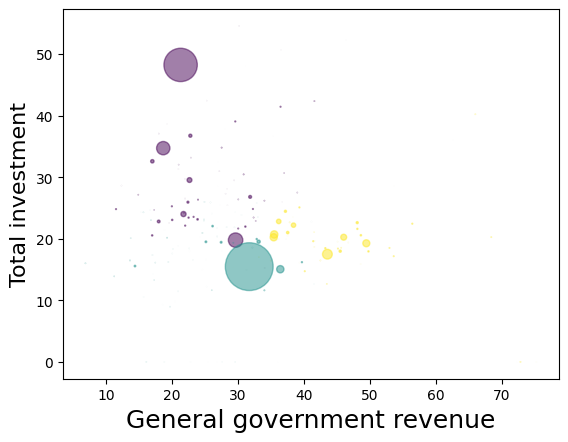

In [48]:
import numpy as np
import matplotlib.pyplot as plt

area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5) # Changed np.float to float
plt.xlabel('General government revenue', fontsize=18)
plt.ylabel('Total investment', fontsize=16)

plt.show()

Distribusi data juga dapat ditampilkan dalam bentuk Plot3D

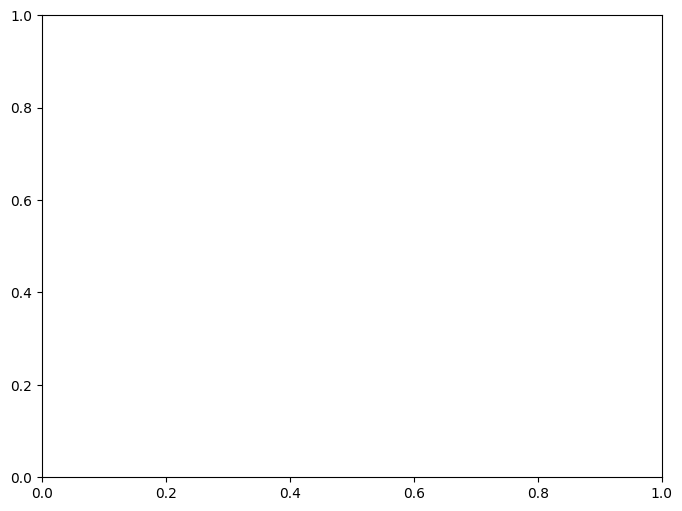

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Gross national savings')
ax.set_ylabel('General government revenue')
ax.set_zlabel('Current account balance')

# Use float instead of np.float
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))

# Find the Optimal Number of Clusters with Elbow Method
Lakukan perhitungan nilai Sum Squared Error (SSE) dengan rentang nilai k dari 1 hingga 10.

In [52]:
sse = [] # sum squared error
for k in range(1, 11):
  kmeans = KMeans(init = "k-means++", n_clusters = k)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

Tampilkan hasilnya dalam bentuk grafik / plot

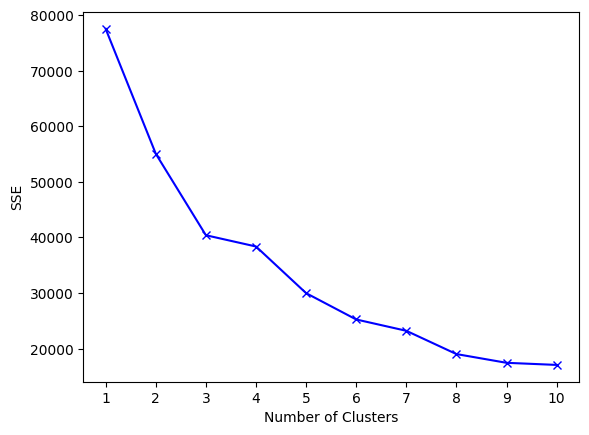

In [53]:
plt.plot(range(1, 11), sse, 'bx-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Secara visual, dari grafik di atas kita dapat menyimpulkan bahwa jumlah klaster terbaik berdasarkan metode Elbow adalah 3 atau 4 karena pada titik tersebut grafik SSE mulai mendatar.

Apakah penentuan jumlah klaster dapat dilakukan secara otomatis?.

Jawabnya, bisa. Kita akan mencoba memanfaatkan package kneed.

Pertama, kita perlu menginstall package kneed:

In [54]:
!pip install --upgrade kneed

In [55]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('Jumlah klaster paling optimal = ',kl.elbow)

Jumlah klaster paling optimal =  5
